# Explore VAE latent space

In [16]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [40]:
def torch_load_gpu_on_cpu(path):
    return torch.load(path, map_location=lambda storage, loc: storage)

vae = torch_load_gpu_on_cpu('models/vae-512-64-26000.torch')
#vae = torch_load_gpu_on_cpu('models/vae-256-64-85000.torch')
#vae = torch_load_gpu_on_cpu('models/vae-64-64-99000.torch')
vae

VAE (
  (encoder): Sequential (
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU (inplace)
    (3): Conv2d(16, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU (inplace)
    (6): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (8): ReLU (inplace)
    (9): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (11): ReLU (inplace)
    (12): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU (inplace)
    (15): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (16): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (17):

In [41]:
# Get some samples
N = 5
noise = np.random.normal(size=[N*N, vae.latent, 1, 1])
noise = Variable(torch.Tensor(noise))
samples = vae.decoder(0.1*noise)

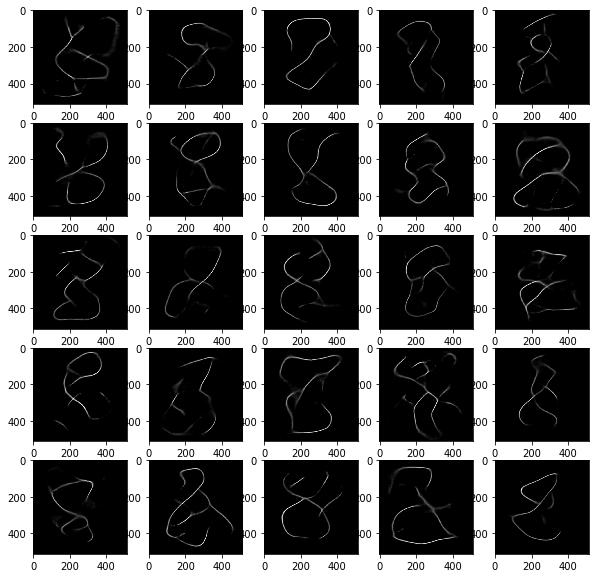

In [42]:
# Plot samples
for i in xrange(N*N):
    plt.subplot(N, N, i+1)
    #plt.figure()
    plt.imshow(samples[i,0].data.numpy(), cmap='gray')